# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
#plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [35]:
# Load the dataset
df = pd.read_csv('./data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [36]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [37]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

# Ensure 'Year' is treated as an integer
#df['Year'] = df['Year'].astype(int)

# Aggregate data by Year with different functions
#df_new = df.groupby('Year').mean().reset_index()

# Display the first few rows
#print(df_new.head())

# Save to a CSV file
#df_new.to_csv('aggregated_data.csv', index=False)
# Step 1: Aggregate data by year
df_new = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Step 2: Sort values by year to ensure chronological order
df_new = df_new.sort_values('Year')
df_new.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

In [38]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Descriptive Statistics
# Select the column for analysis
column_names = ["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]

for column in column_names:
    data = df_new[column]
    mean_val = data.mean()
    median_val = data.median()
    std_dev = data.std()
    min_val = data.min()
    max_val = data.max()

    # Print statistics
    print(f"Univariate Analysis for {column}:")
    print(df_new[column].describe().round(2))
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum: {min_val:.2f}")
    print(f"Maximum: {max_val:.2f}")
    print("\n")


Univariate Analysis for Global Average Temperature (°C):
count    124.00
mean      14.50
std        0.01
min       14.47
25%       14.49
50%       14.50
75%       14.50
max       14.53
Name: Global Average Temperature (°C), dtype: float64
Mean: 14.50
Median: 14.50
Standard Deviation: 0.01
Minimum: 14.47
Maximum: 14.53


Univariate Analysis for CO2 Concentration (ppm):
count    124.00
mean     350.03
std        0.46
min      348.64
25%      349.69
50%      350.02
75%      350.37
max      351.00
Name: CO2 Concentration (ppm), dtype: float64
Mean: 350.03
Median: 350.02
Standard Deviation: 0.46
Minimum: 348.64
Maximum: 351.00


Univariate Analysis for Sea Level Rise (mm):
count    124.00
mean     149.99
std        1.03
min      148.05
25%      149.21
50%      149.92
75%      150.56
max      152.67
Name: Sea Level Rise (mm), dtype: float64
Mean: 149.99
Median: 149.92
Standard Deviation: 1.03
Minimum: 148.05
Maximum: 152.67


Univariate Analysis for Arctic Ice Area (million km²):
count    12

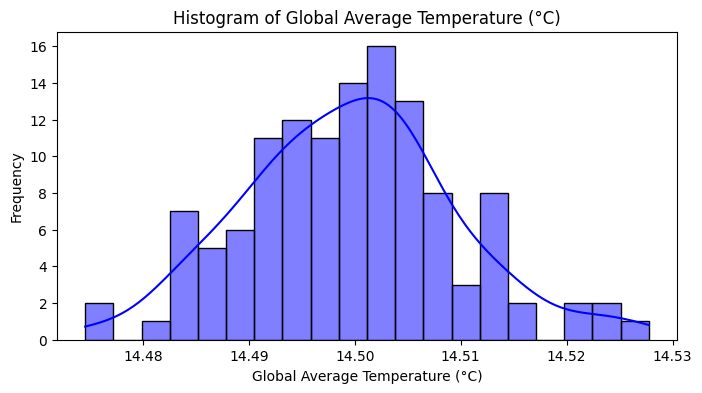

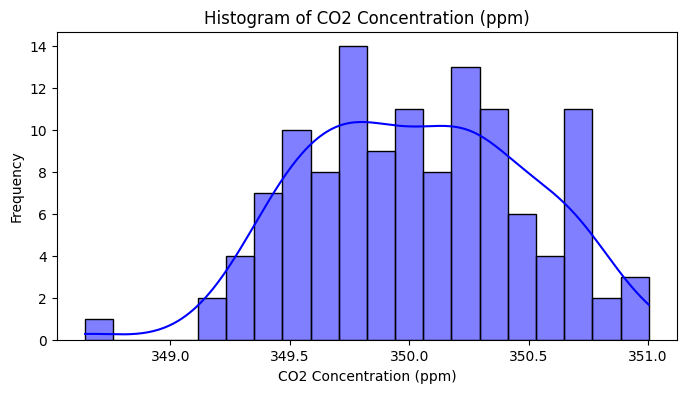

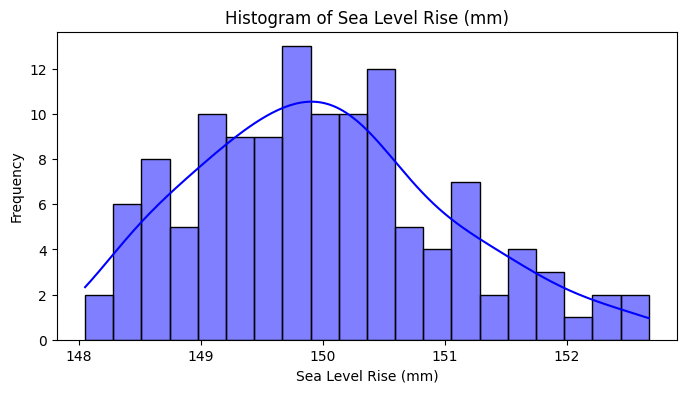

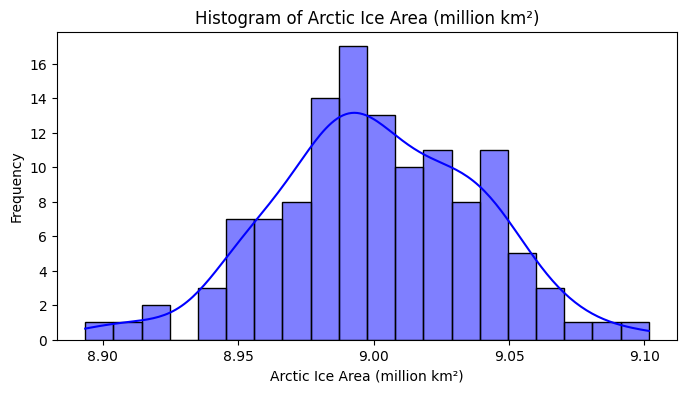

In [39]:
# Histogram to check distribution
for column in column_names:
    data = df_new[column]
    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

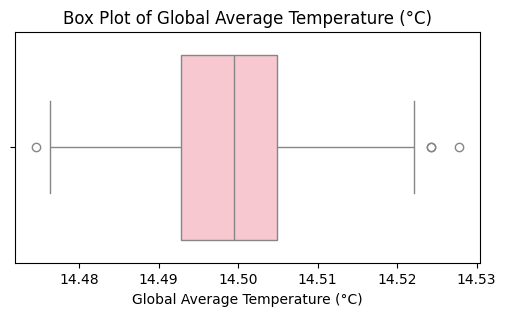

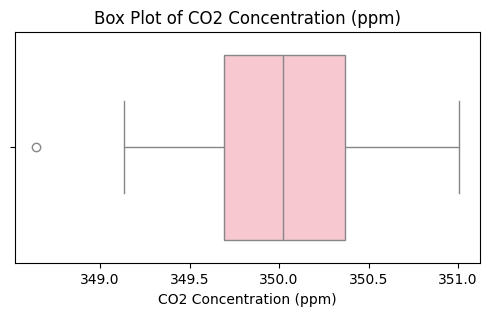

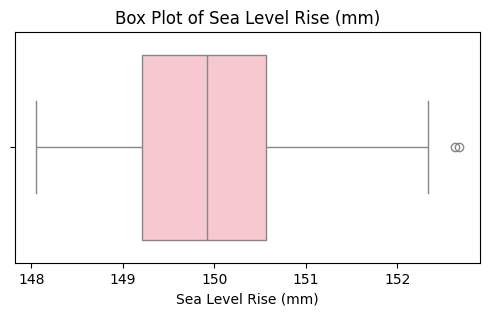

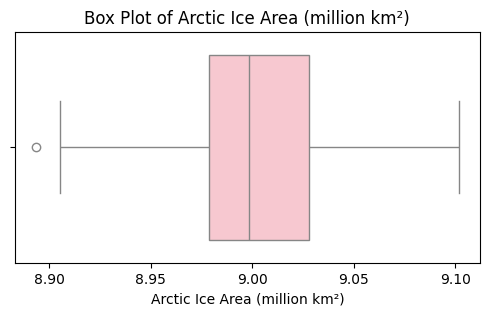

In [40]:
# Box plot to detect outliers
for column in column_names:
    data = df_new[column]
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data, color='pink')
    plt.title(f'Box Plot of {column}')
    plt.show()

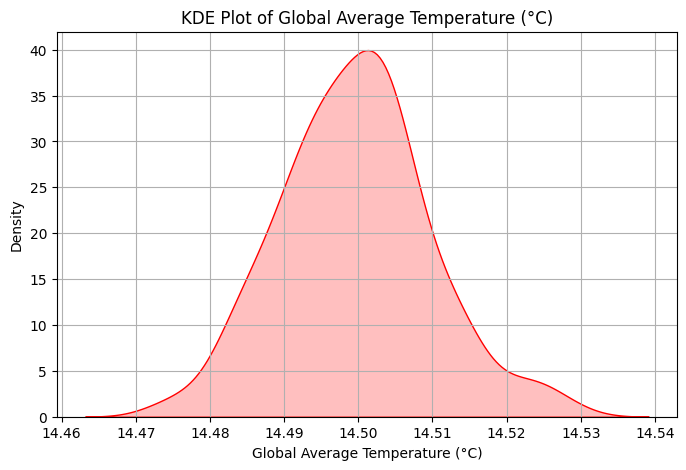

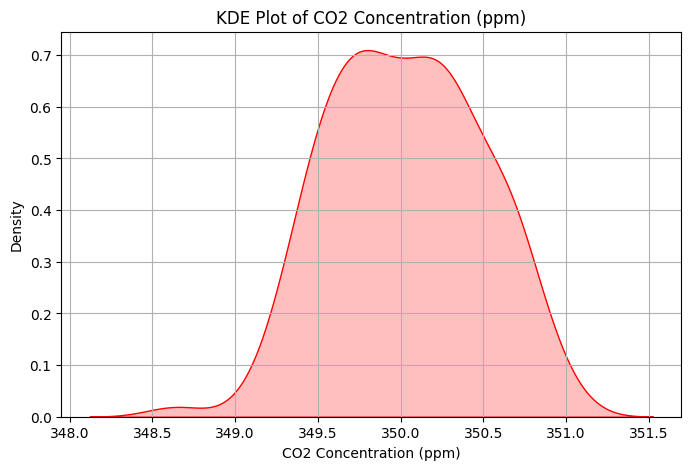

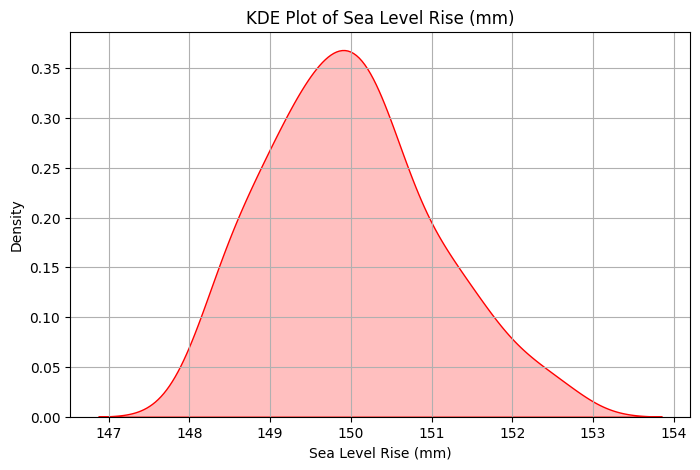

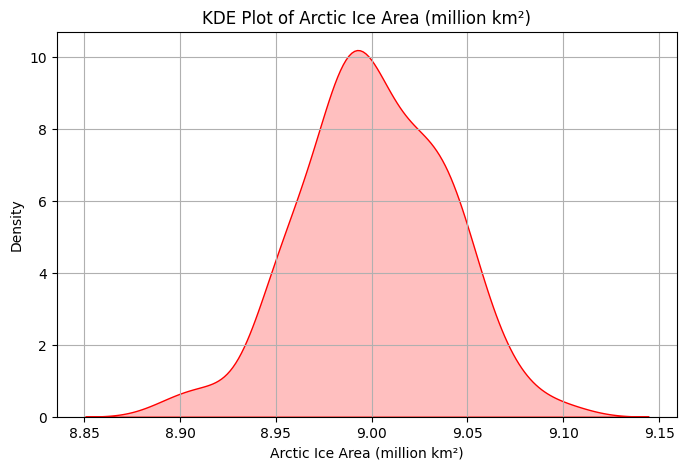

In [41]:
# KDE plots for Univariate Analysis
for column in column_names:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df_new[column], fill=True, color='red')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {column}')
    plt.grid(True)
    plt.show()

<Figure size 800x400 with 0 Axes>

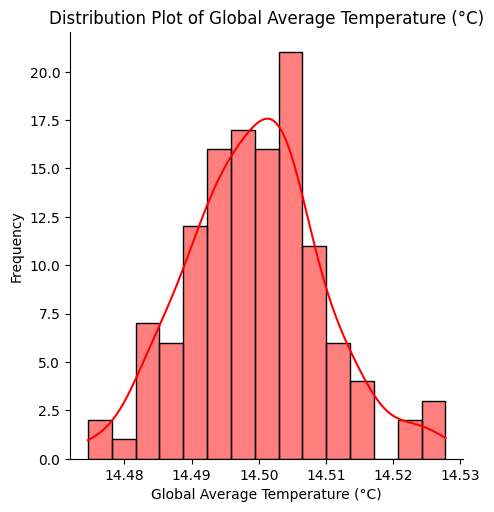

<Figure size 800x400 with 0 Axes>

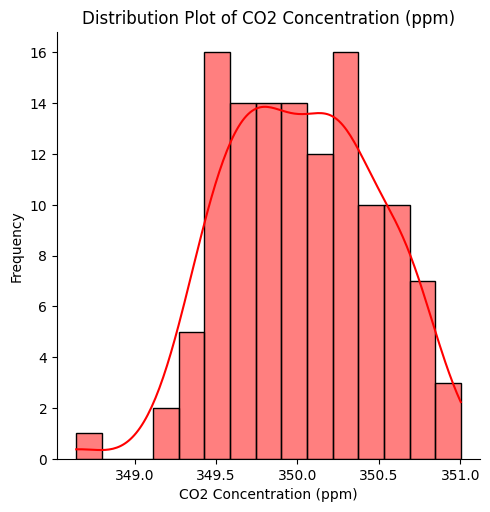

<Figure size 800x400 with 0 Axes>

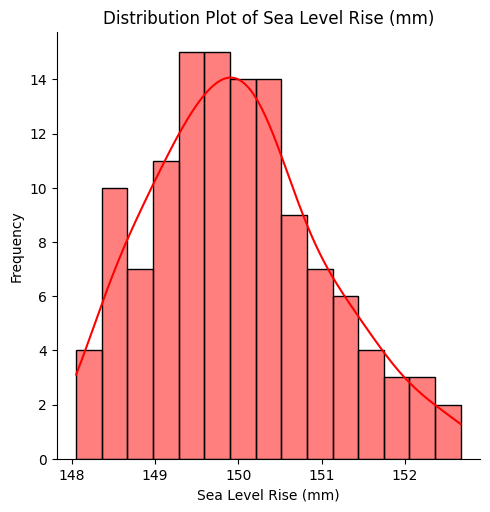

<Figure size 800x400 with 0 Axes>

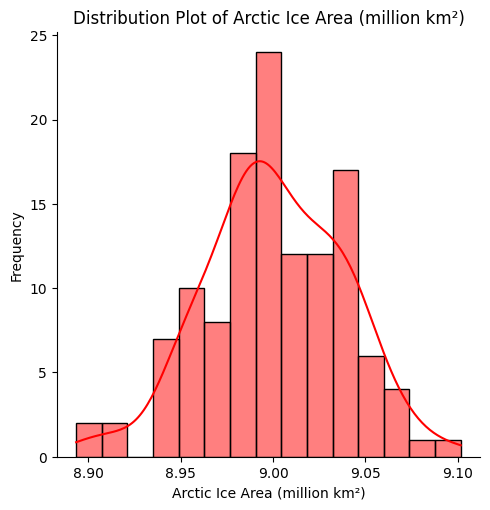

In [42]:
# Distribution Plots
for column in column_names:
    plt.figure(figsize=(8,4))
    sns.displot(df_new[column], kde=True, bins=15, color='red')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column}')
    plt.show()

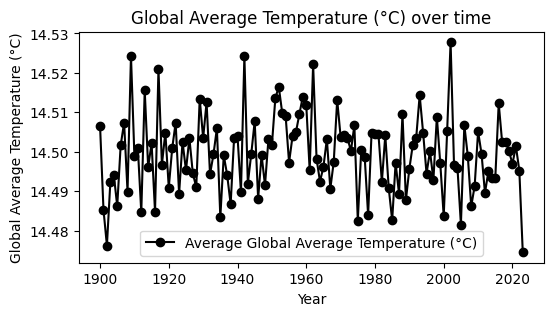

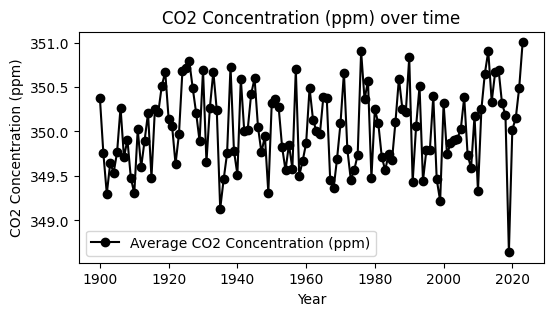

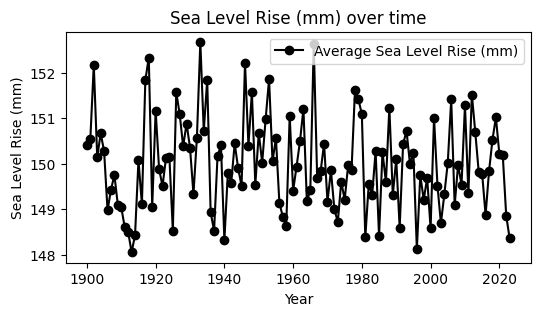

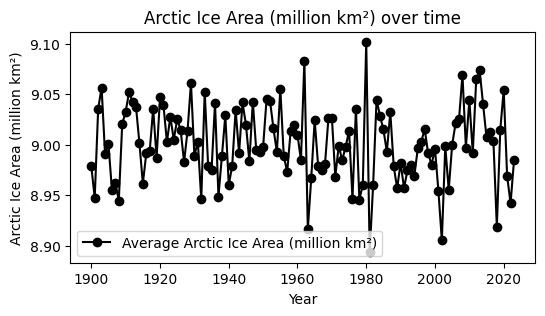

In [43]:
# Time series plot
for column in column_names:
    plt.figure(figsize=(6, 3))
    plt.plot(df_new["Year"], df_new[column], marker='o', linestyle='-',color='black', label=f"Average {column}")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.title(f"{column} over time")
    plt.legend()
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

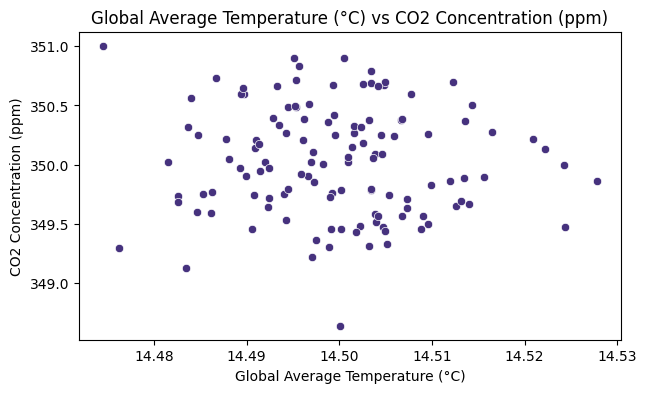

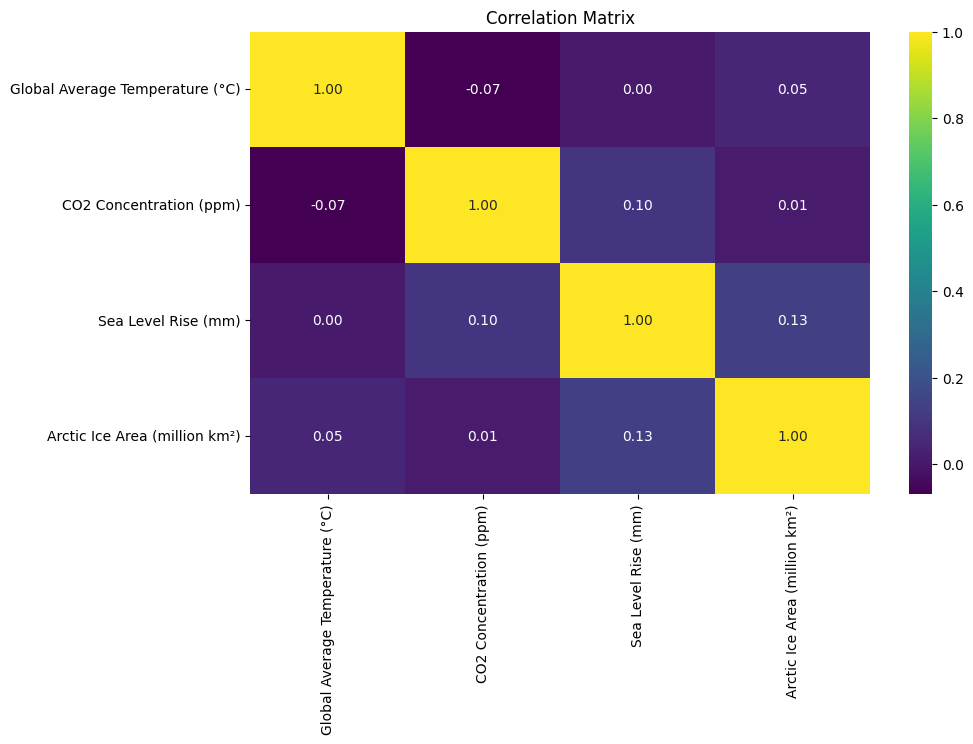

In [44]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

# Scatter plot: Global Average Temperature vs CO2 Concentration
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Global Average Temperature (°C)', y='CO2 Concentration (ppm)', data=df_new)
plt.title('Global Average Temperature (°C) vs CO2 Concentration (ppm)')
plt.xlabel('Global Average Temperature (°C)')
plt.ylabel('CO2 Concentration (ppm)')
plt.show()

# Heatmap of correlations between variables
plt.figure(figsize=(10, 6))
corr_matrix = df_new[['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

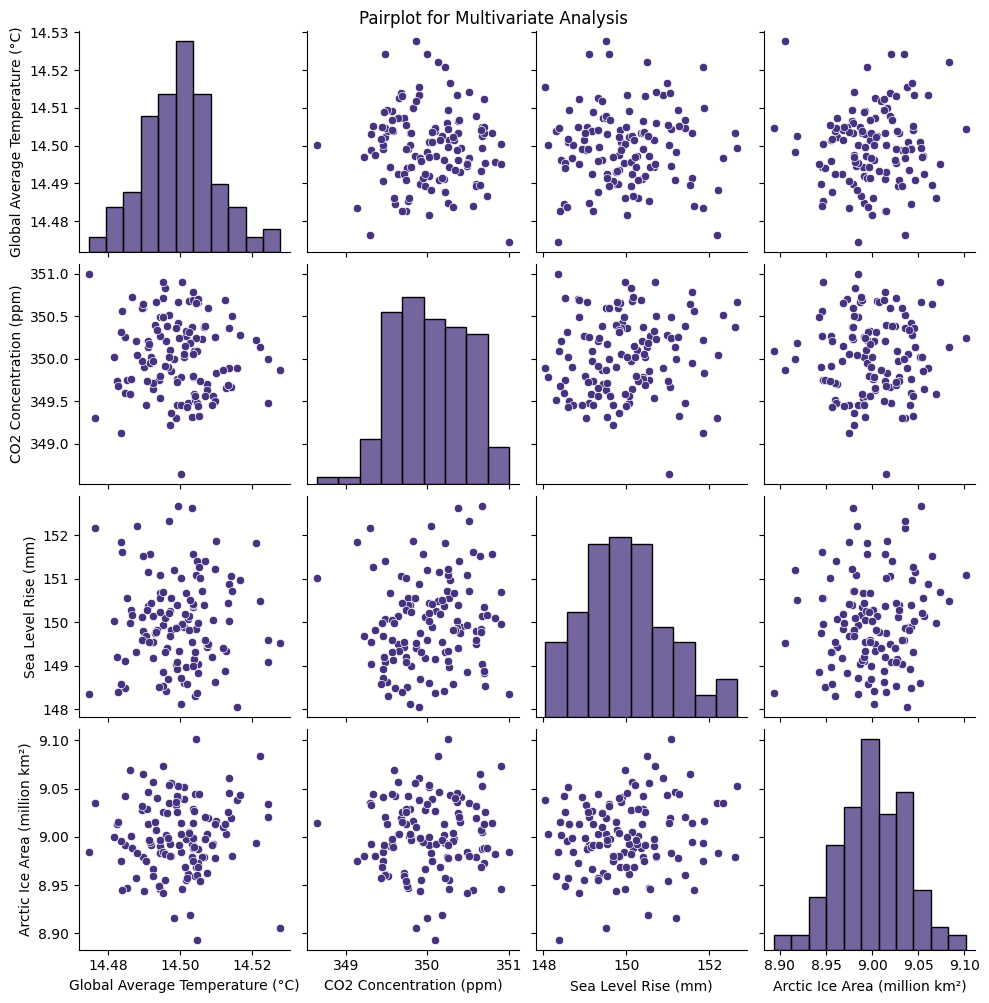

In [45]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

sns.pairplot(df_new[['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']])
plt.suptitle('Pairplot for Multivariate Analysis', y=1)
plt.show()

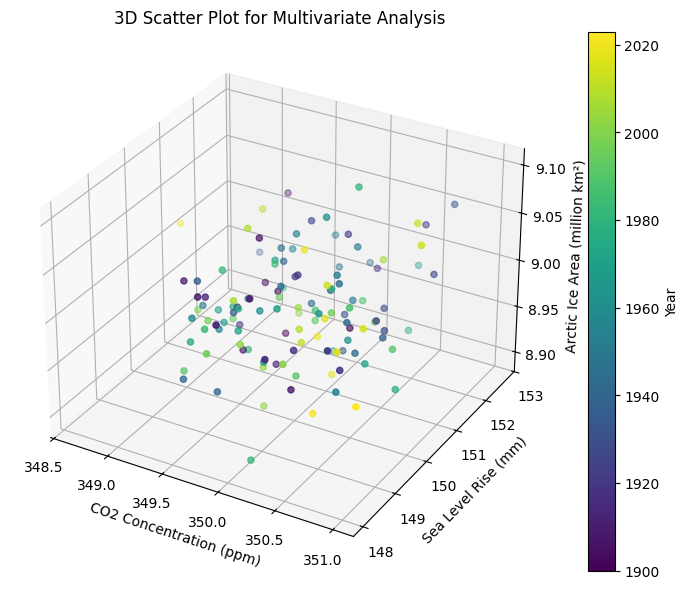

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# Multivariate Analysis: 3D Scatter Plot

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_new['CO2 Concentration (ppm)'], df_new['Sea Level Rise (mm)'], df_new['Arctic Ice Area (million km²)'], c=df_new['Year'], cmap='viridis')
ax.set_xlabel('CO2 Concentration (ppm)')
ax.set_ylabel('Sea Level Rise (mm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
plt.title('3D Scatter Plot for Multivariate Analysis')
plt.colorbar(sc, label='Year')
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

### 5.1 Conclusion and Insights of Univariate Analysis

***A. Global Average Temperature (°C)***

The mean and median are both 14.50°C, indicating a symmetrical distribution with minimal fluctuations.
The standard deviation is extremely low (0.01°C), showing that temperature changes are minimal in this dataset.
The range is only 0.05°C, suggesting very little variation in global average temperatures.

Insight: The temperature data is highly stable with negligible variation, but even small changes can have significant climate impacts over time

***B. CO₂ Concentration (ppm)***

The mean CO₂ concentration is 350.03 ppm, with a median of 350.02 ppm, showing a near-normal distribution.
The range (2.36 ppm) indicates a slight variation in CO₂ levels.
The standard deviation (0.46 ppm) suggests minor fluctuations.

Insight: The data indicates a consistent increase in CO₂ levels, which could be a contributing factor to global temperature changes.

***C. Sea Level Rise (mm)***

The mean sea level is 149.99 mm, with a median of 149.92 mm, showing a slight positive skew.
The range is 4.62 mm, indicating moderate variation.
The standard deviation (1.03 mm) suggests some fluctuation in sea levels over time.

Insight: Rising sea levels, even in small increments, can have severe consequences, such as increased coastal flooding and habitat loss.

***D. Arctic Ice Area (million km²)***

The mean and median are both 9.00 million km², showing a balanced distribution.
The range is 0.21 million km², indicating minor fluctuations.
The low standard deviation (0.04 million km²) suggests minimal changes in Arctic ice area during this period.

Insight: While the data suggests stability, even small decreases in Arctic ice can accelerate global warming due to reduced albedo effect (less ice means more heat absorption by oceans).


### 5.2 Conclusion and Insights of Bivariate Analysis

***A. Scatter Plot Analysis***

The scatter plot visualizes the relationship between Global Average Temperature (°C) and CO2 Concentration (ppm). The plot shows a weak negative correlation between these two variables.

Insight: The weak negative correlation suggests that while CO2 concentration is increasing, it does not have a strong direct impact on the global average temperature in this dataset. Other factors might be influencing the temperature changes.

***B. Correlation Matrix Analysis***

The heatmap of the correlation matrix quantifies the strength and direction of relationships between variables.

Insight: The correlation matrix reveals that:
- CO2 Concentration (ppm) has a weak positive correlation with Sea Level Rise (mm) (0.10) and a very weak positive correlation with Arctic Ice Area (million km²) (0.01).
- Global Average Temperature (°C) has a weak negative correlation with CO2 Concentration (ppm) (-0.07) and a very weak positive correlation with Sea Level Rise (mm) (0.004) and Arctic Ice Area (million km²) (0.05).
- Sea Level Rise (mm) has a weak positive correlation with Arctic Ice Area (million km²) (0.13).

These correlations are not very strong, indicating that the relationships between these variables are complex and may be influenced by other factors not included in this dataset.

Overall, the bivariate analysis suggests that while there are some relationships between the climate variables, they are not very strong. This indicates that climate change is a multifaceted issue influenced by various factors, and a more comprehensive analysis including additional variables might be necessary to fully understand these relationships.

### 5.3 Conclusion and Insights of Multivariate Analysis

***A. 3-D Scatter Plot Analysis***

The 3-D scatter plot visualizes the relationship between CO2 concentration, sea level rise, and Arctic ice area over time. The color gradient represents the year, providing a temporal dimension to the analysis.

Insight: The plot reveals that as CO2 concentration increases, there is a noticeable trend of rising sea levels and decreasing Arctic ice area. This suggests a strong interconnection between these variables, highlighting the impact of increased CO2 levels on sea level rise and Arctic ice reduction.

***B. Pairplot Analysis***

The pairplot provides a comprehensive view of the relationships between all pairs of variables. It includes scatter plots for each pair and histograms for individual variables.

Insight: The pairplot confirms the trends observed in the 3-D scatter plot. It shows a positive correlation between CO2 concentration and sea level rise, and a negative correlation between CO2 concentration and Arctic ice area. Additionally, the histograms indicate the distribution of each variable, supporting the univariate analysis findings.

### 6. Further Investigation

Based on the exploratory data analysis conducted, here are some areas for further investigation:

1. **Impact of Other Greenhouse Gases:**
    - Investigate the impact of other greenhouse gases such as methane (CH4) and nitrous oxide (N2O) on climate change.
    - Analyze their correlation with global average temperature, sea level rise, and Arctic ice area.

2. **Regional Analysis:**
    - Perform a regional analysis to understand how climate change impacts vary across different parts of the world.
    - Compare climate variables across continents or specific countries.

3. **Seasonal Variations:**
    - Analyze seasonal variations in climate variables.
    - Investigate how different seasons affect global average temperature, CO2 concentration, sea level rise, and Arctic ice area.

4. **Extreme Weather Events:**
    - Study the frequency and intensity of extreme weather events such as hurricanes, droughts, and heatwaves.
    - Analyze their correlation with climate variables.

5. **Long-term Projections:**
    - Use climate models to project future trends in global average temperature, CO2 concentration, sea level rise, and Arctic ice area.
    - Assess the potential impacts of different climate scenarios.

6. **Human Activities:**
    - Investigate the role of human activities such as deforestation, industrialization, and urbanization in climate change.
    - Analyze their impact on climate variables.

7. **Mitigation and Adaptation Strategies:**
    - Explore various mitigation and adaptation strategies to combat climate change.
    - Assess the effectiveness of policies and measures implemented to reduce greenhouse gas emissions and adapt to climate impacts.

8. **Biodiversity and Ecosystems:**
    - Study the impact of climate change on biodiversity and ecosystems.
    - Analyze how changes in climate variables affect different species and habitats.

These areas of further investigation can provide a deeper understanding of the complex dynamics of climate change and help in developing effective strategies to address its impacts.